# AIMM post processing package
To install the package, 

`git clone git@github.com:zhul9311/aimm-post-processing.git`

In the package folder, run

 `python setup.py develop`

In [1]:
# from os import remove
# from numpy import identity
import sys
import tiled
from tiled.client import from_uri
from aimm_post_processing.operations import (
    Pull,
    Identity,
    RemoveBackground, 
    StandardizeGrid,
    StandardizeIntensity
)
from aimm_post_processing.pipeline import Pipeline

%reload_ext autoreload
%autoreload 1
%aimport aimm_post_processing.pipeline
%aimport aimm_post_processing.operations
%aimport isstools.xasproject.xasproject

In [100]:
client = from_uri("https://aimm.lbl.gov/api")
view = client['dataset']['newville']['uid']["tFrGpD3A8BX"]

In [106]:
view.metadata

{'_tiled': {'uid': 'tFrGpD3A8BX'},
 'beamline': {'name': 'SSRL 4-3'},
 'column': {'1': 'energy eV',
            '2': 'mutrans',
            '3': 'mufluor',
            '4': 'murefer',
            '5': 'i0'},
 'comments': '#    Note: mono d_spacing is nominal!\n',
 'dataset': 'newville',
 'detector': {'I0': 'N2 15cm',
              'I1': 'N2+Ar 30cm',
              'I2': 'Ar',
              'If': 'Ar (Lytle detector, using Rb filter)'},
 'element': {'edge': 'K', 'symbol': 'Sr'},
 'extra_version': 'EXAFS',
 'measurement_type': 'xas',
 'mono': {'d_spacing': '1.920128',
          'name': 'Si(220)',
          'notes': '(?) unfocussed, detuned 50%, clockwise at E=17000eV'},
 'sample': {'formula': 'SrTiO3',
            'name': 'strontium titanate',
            'prep': 'powder',
            'reference': 'SrCO3',
            'temperature': 'room temperature',
            'uid': 'tRXudRtJTio'},
 'sample_id': 'tRXudRtJTio',
 'scan': {'start_time': '1995-06-14 20:43:05'},
 'xdi_version': '1.0'}

In [102]:
pull = Pull()

In [103]:
df_ = pull(view)["data"]

<AxesSubplot:xlabel='energy'>

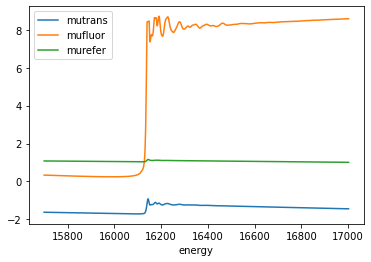

In [105]:
df_.plot(x="energy", y=["mutrans", "mufluor", "murefer"])

# Operation Chains

In [111]:
pull = Pull()
identity = Identity()
standardizegrid = StandardizeGrid(
    x0=15700, 
    xf=17000, 
    nx=1301,
    x_column="energy",
    y_columns=["mutrans", "mufluor", "murefer"]
)
removebackground = RemoveBackground(
    x0=15700, 
    xf=15800, 
    x_column="energy",
    y_columns=["mutrans", "mufluor", "murefer"],
    victoreen_order=0
)
standardizeintensity = StandardizeIntensity(
    x0=15700,
    xf=15800,
    x_column="energy",
    y_columns=["mutrans", "mufluor", "murefer"]
)

In [112]:
pipe0 = Pipeline(
    [
        pull,
        standardizegrid,
        removebackground
    ]
)

In [113]:
d = pipe0.run(view)

<AxesSubplot:xlabel='energy'>

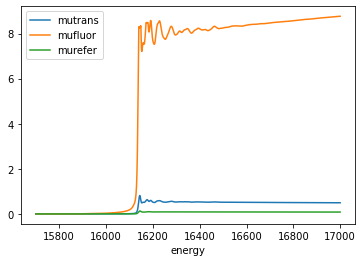

In [115]:
d["data"].plot(x="energy", y=["mutrans", "mufluor", "murefer"])

In [117]:
d["metadata"]["post_processing"]

{0: {'id': '809204c7-fd39-443f-8cbf-334d79bb99bc',
  'parent': 'tFrGpD3A8BX',
  'operator': {'@module': 'aimm_post_processing.operations',
   '@class': 'Pull',
   '@version': '0.post30.dev0+gc39a006'},
  'kwargs': {'x_column': 'energy',
   'y_columns': ['mu'],
   'operator_id': 'bacfa93b-b113-4025-9eed-0aec5398d901'},
  'datetime': '2022-08-05 17:55:39 UTC'},
 1: {'id': '7ab79a64-91d9-4d61-8689-7d592005fa9e',
  'parent': '809204c7-fd39-443f-8cbf-334d79bb99bc',
  'operator': {'@module': 'aimm_post_processing.operations',
   '@class': 'StandardizeGrid',
   '@version': '0.post30.dev0+gc39a006',
   'x0': 15700,
   'xf': 17000,
   'nx': 1301,
   'interpolated_univariate_spline_kwargs': {},
   'x_column': 'energy',
   'y_columns': ['mutrans', 'mufluor', 'murefer']},
  'kwargs': {'x_column': 'energy',
   'y_columns': ['mutrans', 'mufluor', 'murefer'],
   'operator_id': '808fdc46-3eb9-4404-ad07-9802f3cca0ab',
   'x0': 15700,
   'xf': 17000,
   'nx': 1301,
   'interpolated_univariate_spline_kwa

In [118]:
pipe1 = Pipeline(
    [
        identity,
        standardizegrid,
        standardizeintensity
    ]
)

In [119]:
d = pipe1.run(d)

<AxesSubplot:xlabel='energy'>

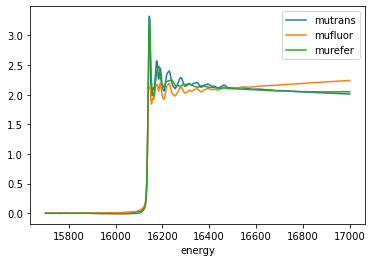

In [120]:
d["data"].plot(x="energy", y=["mutrans", "mufluor", "murefer"])

In [121]:
d["metadata"]["post_processing"]

{0: {'id': '147d2527-059c-4221-a324-4e2f0aa332cc',
  'parent': 'tFrGpD3A8BX',
  'operator': {'@module': 'aimm_post_processing.operations',
   '@class': 'Identity',
   '@version': '0.post30.dev0+gc39a006'},
  'kwargs': {'x_column': 'energy',
   'y_columns': ['mu'],
   'operator_id': '3fd670ab-6ef7-4712-b061-3058c0494b2c'},
  'datetime': '2022-08-05 17:57:15 UTC'},
 1: {'id': '0528a66a-e8d5-4032-b518-154d53aa334b',
  'parent': '147d2527-059c-4221-a324-4e2f0aa332cc',
  'operator': {'@module': 'aimm_post_processing.operations',
   '@class': 'Identity',
   '@version': '0.post30.dev0+gc39a006'},
  'kwargs': {'x_column': 'energy',
   'y_columns': ['mu'],
   'operator_id': 'cfae199d-357e-4bea-8d2f-c765e3d8b00d'},
  'datetime': '2022-08-05 17:57:15 UTC'},
 2: {'id': 'a65d8a4f-e5f4-4d2f-89a6-364ccf07884c',
  'parent': '0528a66a-e8d5-4032-b518-154d53aa334b',
  'operator': {'@module': 'aimm_post_processing.operations',
   '@class': 'StandardizeGrid',
   '@version': '0.post30.dev0+gc39a006',
   'x0

# Pipeline Chains

In [122]:
pipe2 = Pipeline(
    [
        pull,
        standardizegrid,
    ]
)
pipe3 = Pipeline(
    [
        removebackground,
        standardizeintensity
    ]
)
pipe4 = pipe2 + pipe3

In [123]:
d = pipe4.run(view)

<AxesSubplot:xlabel='energy'>

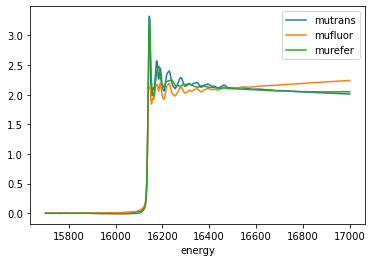

In [124]:
d["data"].plot(x="energy", y=["mutrans", "mufluor", "murefer"])

In [125]:
d["metadata"]["post_processing"]

{0: {'id': '879b3732-8bea-4616-a47d-0357bd53efbe',
  'parent': 'tFrGpD3A8BX',
  'operator': {'@module': 'aimm_post_processing.operations',
   '@class': 'Pull',
   '@version': '0.post30.dev0+gc39a006'},
  'kwargs': {'x_column': 'energy',
   'y_columns': ['mu'],
   'operator_id': 'bacfa93b-b113-4025-9eed-0aec5398d901'},
  'datetime': '2022-08-05 17:58:12 UTC'},
 1: {'id': '7c9885c0-b7ee-4bc4-964c-568bc5d60e8a',
  'parent': '879b3732-8bea-4616-a47d-0357bd53efbe',
  'operator': {'@module': 'aimm_post_processing.operations',
   '@class': 'StandardizeGrid',
   '@version': '0.post30.dev0+gc39a006',
   'x0': 15700,
   'xf': 17000,
   'nx': 1301,
   'interpolated_univariate_spline_kwargs': {},
   'x_column': 'energy',
   'y_columns': ['mutrans', 'mufluor', 'murefer']},
  'kwargs': {'x_column': 'energy',
   'y_columns': ['mutrans', 'mufluor', 'murefer'],
   'operator_id': '808fdc46-3eb9-4404-ad07-9802f3cca0ab',
   'x0': 15700,
   'xf': 17000,
   'nx': 1301,
   'interpolated_univariate_spline_kwa

# User-defined operator

In [126]:
# All operators are defined based on Operator class
from aimm_post_processing.operations import Operator


### The template for creating user-defined operator ### 
class MyOperator(Operator):
    # Replace `MyOperaor` with your favorate name.
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs) 
        # *args and **kwargs are user defined parameters needed for the operator.
        # all extra args and kwargs must also defined as local attributes if you want
        # to use them in `_process_data` function.
        # E.g. If you have __init__(self, x, y=5, x_column="energy", y_columns=["mu"])
        #      in definition, you must also have self.x = x and self.y = y
        #      "x_column" and "y_columns" ar already implemented automatically, so you
        #.     don't need to worry about them.

    def _process_data(self, df):
        """
        Parameters
        ----------
        df : pandas.DataFrame
            The dataframe that has columns such as "energy", "mu", etc.

        Returns
        -------
        df : pandas.DataFrame
            Processed dataframe
        """
        ### Write your code here ###
        
        new_df = df # this line is to be replaced
        
        return new_df


### An example implementation ###

class Shift(Operator):
    """This example shifts the energy grid by x
    """
    def __init__(self, x, x_column="energy", y_columns=["mu"]):
        super().__init__(x_column, y_columns)
        self.x = x # must have this line.
        
    def _process_data(self, df):
        shift = self.x
        energy_grid = df[self.x_column]
        df[self.x_column] = energy_grid + shift
        return df

In [128]:
client = from_uri("https://aimm.lbl.gov/api")
view = client['dataset']['newville']['uid']["tFrGpD3A8BX"]

<AxesSubplot:xlabel='energy'>

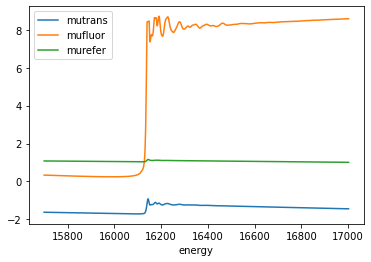

In [129]:
df = view.read()
df.plot(x="energy", y=["mutrans", "mufluor", "murefer"])

In [130]:
pull = Pull()
shift_operator = Shift(1000)

In [131]:
data_dict = pull(view)
new_dict = shift_operator(data_dict)

<AxesSubplot:xlabel='energy'>

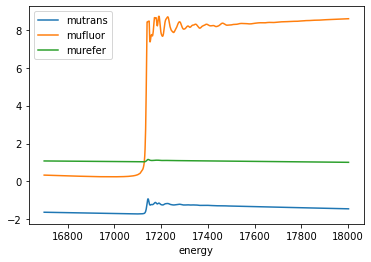

In [132]:
new_dict["data"].plot(x="energy", y=["mutrans", "mufluor", "murefer"])

In [133]:
new_dict["metadata"]["post_processing"]

{'id': '553875d9-9f6a-47b9-818f-2564deed9887',
 'parent': '0bf40a8f-48c5-4944-b79f-2a4e90f1b6f4',
 'operator': {'@module': '__main__',
  '@class': 'Shift',
  '@version': None,
  'x': 1000,
  'x_column': 'energy',
  'y_columns': ['mu']},
 'kwargs': {'x_column': 'energy',
  'y_columns': ['mu'],
  'operator_id': '8af7626e-61fc-4287-bc07-31b6ac8f9726',
  'x': 1000},
 'datetime': '2022-08-05 17:58:44 UTC'}